In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('calculations_no_k2raster.csv')

In [3]:
dataset

,Name,Ratio,Time,Size,Parameters,Type
0,FPC,1.269707,661133500,8388608,-,C
1,FPC,1.269707,232440100,8388608,-,D
2,FPC,1.263228,539096300,8388608,-,C
3,FPC,1.263228,185544000,8388608,-,D
4,FPC,1.300424,515848500,8388608,-,C
...,...,...,...,...,...,...
63395,SZ,23.693420,166200,32768,0.3,D
63396,SZ,25.781275,905500,32768,0.3,C
63397,SZ,25.781275,163200,32768,0.3,D
63398,SZ,26.404512,903200,32768,0.3,C


In [4]:
print(pd.unique(dataset['Name']))

['FPC' 'BitGrooming' 'BitShaving' 'DigitRouting' 'SZ']


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63400 entries, 0 to 63399
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        63400 non-null  object 
 1   Ratio       63400 non-null  float64
 2   Time        63400 non-null  int64  
 3   Size        63400 non-null  int64  
 4   Parameters  63400 non-null  object 
 5   Type        63400 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.9+ MB


# Graph of the dependence of the compression time on the file size

In [6]:
FPC = dataset[(dataset['Name'] == 'FPC') & (dataset['Type'] == 'C')]
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'C')]
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'C')]
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
SZ = dataset[(dataset['Name'] == 'SZ') & (dataset['Type'] == 'C')]

In [7]:
FPCTS = FPC[['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Time', 'Size']].groupby(['Size']).mean()
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Time', 'Size']].groupby(['Size']).mean()

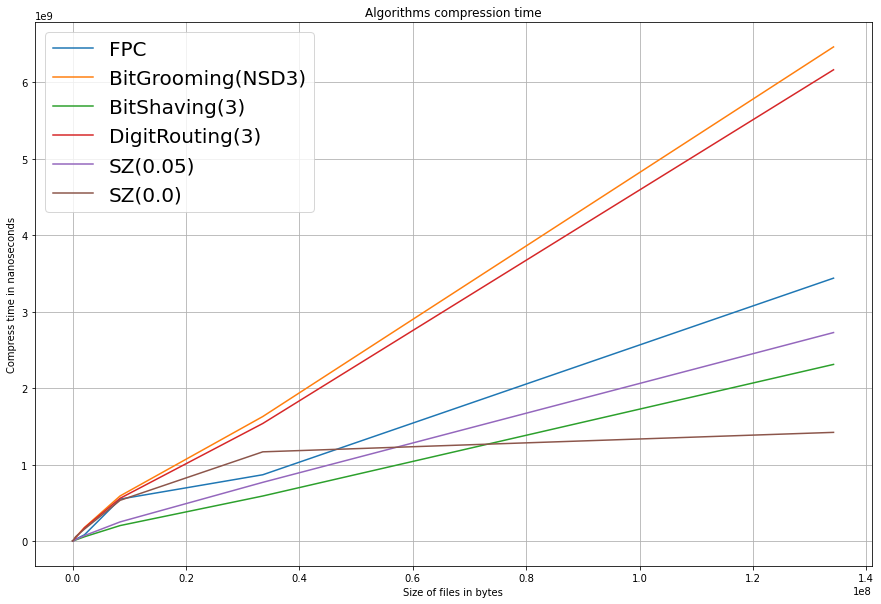

In [8]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the compression time on the file size for lossy compression algorithms

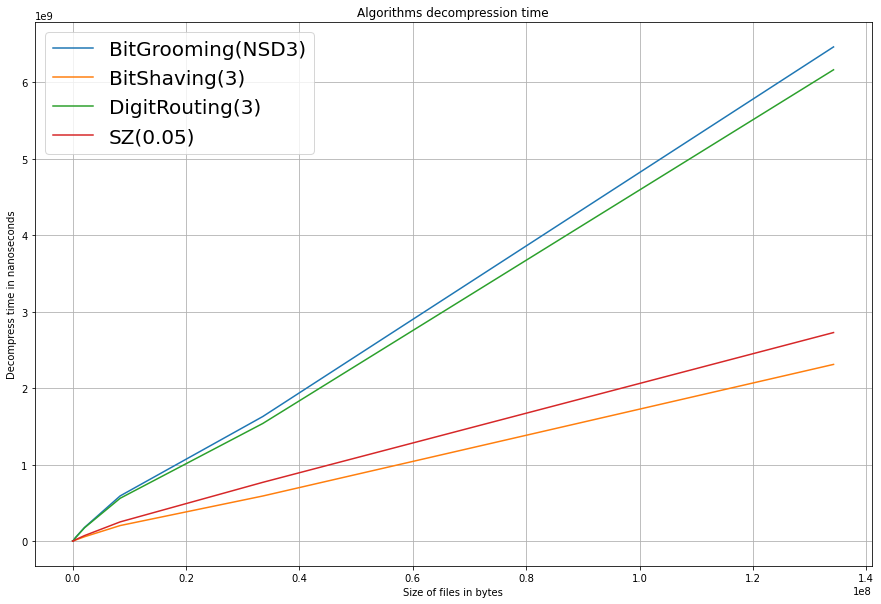

In [9]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the compression time on the file size for lossless compression algorithms

In [1]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

NameError: name 'plt' is not defined

# Graph of the dependence of the decompression time on the file size

In [11]:
FPC = dataset[(dataset['Name'] == 'FPC') & (dataset['Type'] == 'D')]
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'D')]
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'D')]
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'D')]
SZ = dataset[(dataset['Name'] == 'SZ') & (dataset['Type'] == 'D')]

In [12]:
FPCTS = FPC[['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Time', 'Size']].groupby(['Size']).mean()
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Time', 'Size']].groupby(['Size']).mean()

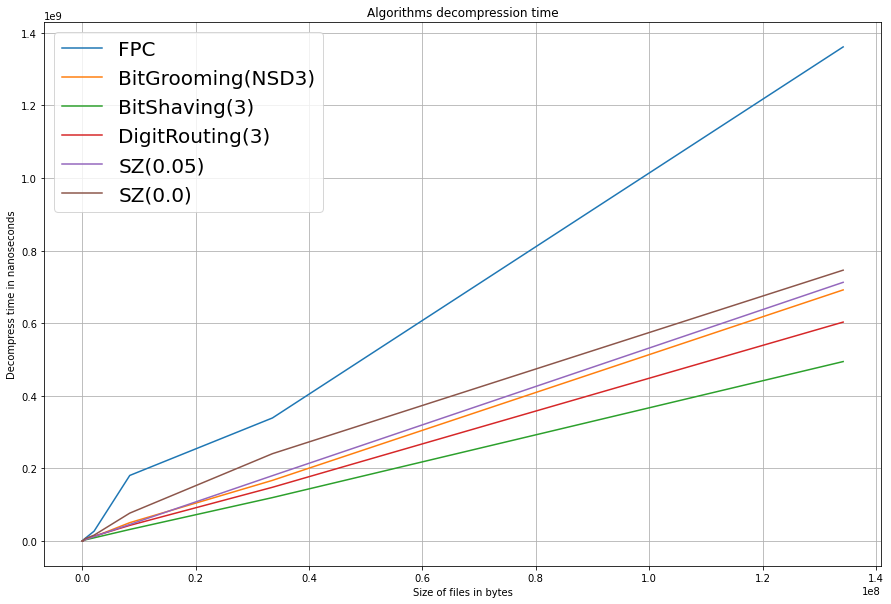

In [13]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the decompression time on the file size for lossy compression algorithms

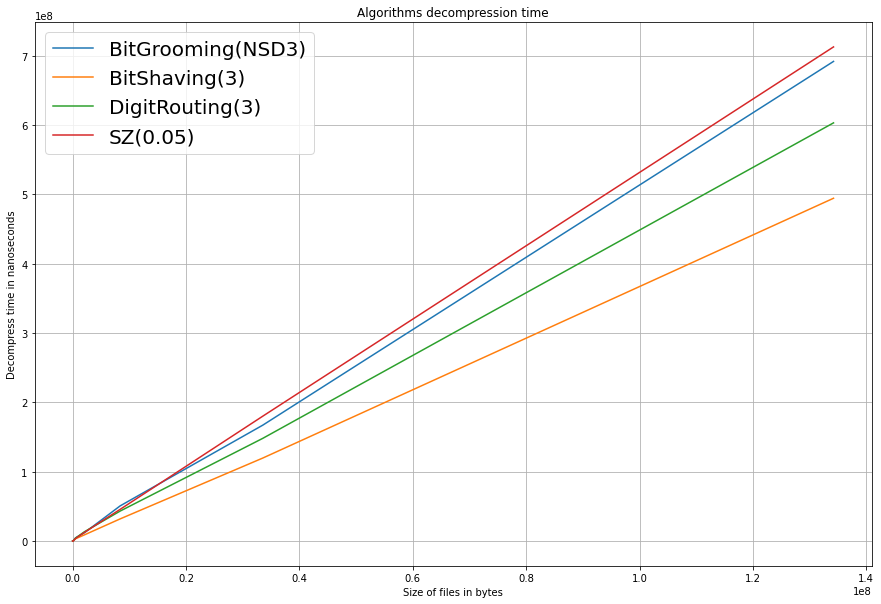

In [14]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
plt.plot(SZ005['Time'], label = 'SZ(0.05)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the decompression time on the file size for lossless compression algorithms

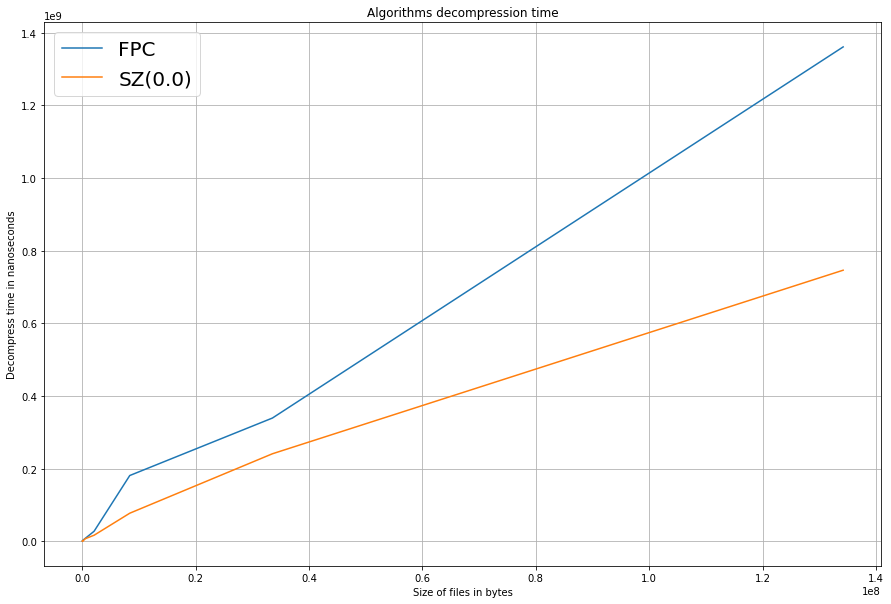

In [15]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(SZ0['Time'], label = 'SZ(0.0)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size

In [16]:
FPCTS = FPC[['Ratio', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Ratio', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ005 = SZ[SZ['Parameters'] == '0.05'][['Ratio', 'Size']].groupby(['Size']).mean()
SZ0 = SZ[SZ['Parameters'] == '0.0'][['Ratio', 'Size']].groupby(['Size']).mean()

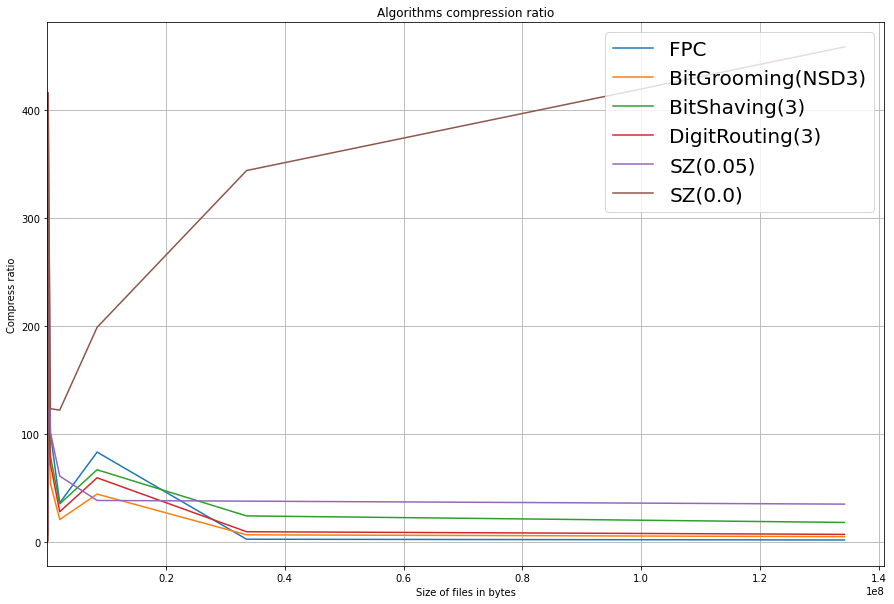

In [17]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Ratio'], label = 'FPC')
plt.plot(BGTS3['Ratio'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Ratio'], label = 'BitShaving(3)')
plt.plot(DR3['Ratio'], label = 'DigitRouting(3)')
plt.plot(SZ005['Ratio'], label = 'SZ(0.05)')
plt.plot(SZ0['Ratio'], label = 'SZ(0.0)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for lossy compression algorithms

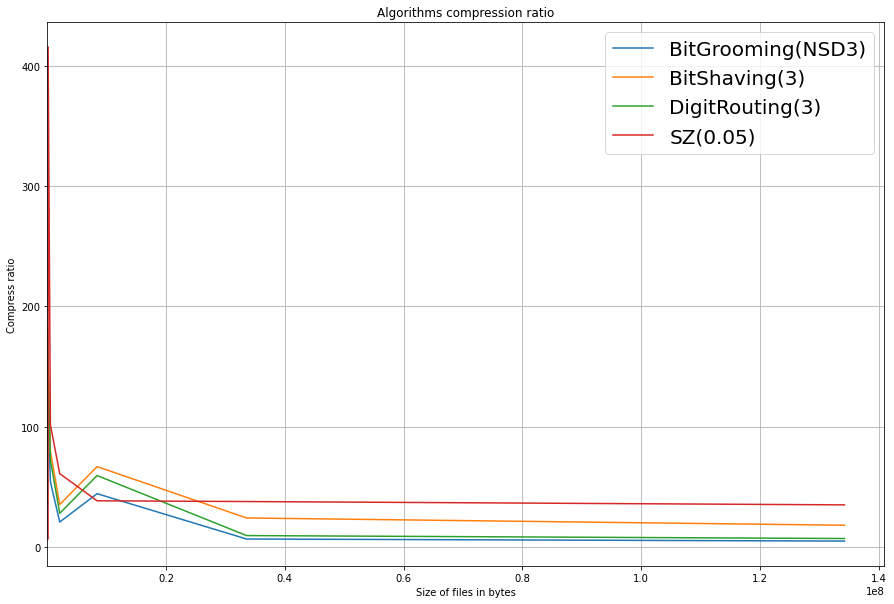

In [18]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Ratio'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Ratio'], label = 'BitShaving(3)')
plt.plot(DR3['Ratio'], label = 'DigitRouting(3)')
plt.plot(SZ005['Ratio'], label = 'SZ(0.05)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for lossless compression algorithms

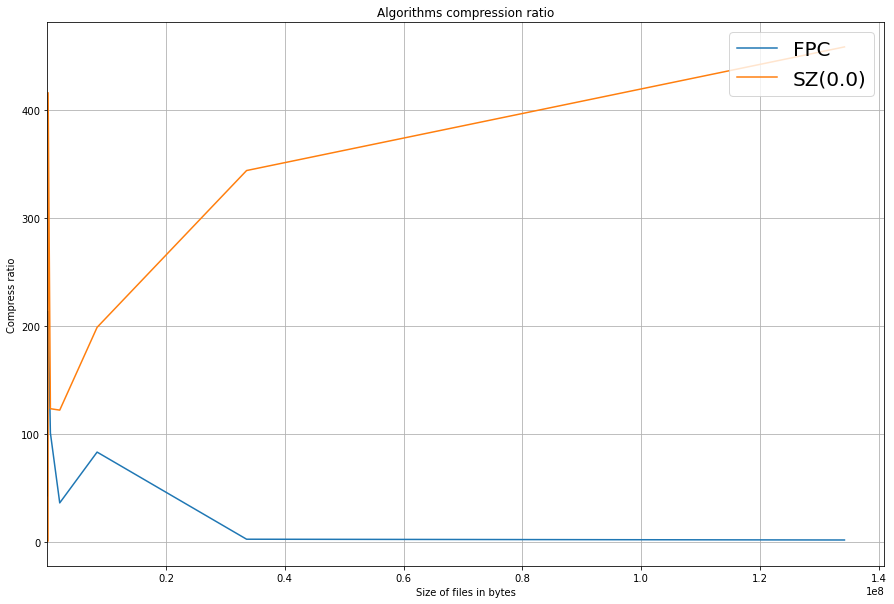

In [19]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Ratio'], label = 'FPC')
plt.plot(SZ0['Ratio'], label = 'SZ(0.0)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()